# Dimension reduction for top predictions
* Created on 12 07 2023 by Jie Shi
* Implemented tsne, UMAP


In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 
import csv 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
#import pdb
from platform import python_version

In [4]:
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers,Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Average, BatchNormalization, LSTM, TimeDistributed
from tensorflow.keras.layers import Conv1D,MaxPool1D, concatenate
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.initializers import RandomNormal,HeNormal,GlorotNormal,HeUniform,LecunNormal,LecunUniform,Orthogonal
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from itertools import product
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [5]:
import scipy.stats# x x x x x
from sklearn.manifold import TSNE

In [6]:
import pickle # for saving ML models 

In [ ]:
import umap

In [9]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.labelsize'] = 18
#plt.rcParams['xtick.major.size'] = 3
#plt.rcParams['xtick.major.width'] = 2
#plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.labelsize'] = 20
#plt.rcParams['ytick.major.width'] = 1
#plt.rcParams['ytick.minor.size'] = 5
#plt.rcParams['figure.figsize'] =  (30, 30)
plt.rcParams['axes.titlesize'] = 18

plt.rcParams['axes.labelsize'] = 20
#plt.rcParams['axes.labelsize'] = 16

plt.rcParams['axes.grid'] = False
# Resolution
# Legend Parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['legend.fontsize'] = 12

## Load data from file

### CNN + LSTM

In [4]:
neu_predict=pd.read_csv('data_predict/screen_prediction_05152023_nodup_cnn_lstm.csv',sep=',')
display(neu_predict)

neu_top = neu_predict.drop([neu_predict.columns[0],neu_predict.columns[-1]],axis = 1)
neu_tmp = neu_top.iloc[:100,:]

Unnamed: 0  Pex1  Pex2  Pex3  Pex4  Pex5  Pex6  Pex8  Pex10  Pex11  ...  \
0       31437312     1     1     1     0     1     1     1      1      1  ...   
1       31453696     1     1     1     0     1     1     1      1      1  ...   
2       31453697     1     1     1     0     1     1     1      1      1  ...   
3       31439360     1     1     1     0     1     1     1      1      1  ...   
4       31437313     1     1     1     0     1     1     1      1      1  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
9995    31191625     1     1     1     0     1     1     0      1      1  ...   
9996    14659648     0     1     1     0     1     1     1      1      1  ...   
9997    23032321     1     0     1     0     1     1     1      1      1  ...   
9998    33533474     1     1     1     1     1     1     1      1      1  ...   
9999    18362880     1     0     0     0     1     1     0      0      0  ...   

      Pex28  Pex29  Pex30  Pex31  Pex32  Pex34  Sei1  Rtn1  Vps1  \
0         0      0      0      0      0      0     0     0     0   
1         0      0      0      0      0      0     0     0     0   
2         0      0      0      0      0      0     0     0     1   
3         0      0      0      0      0      0     0     0     0   
4         0      0      0      0      0      0     0     0     1   
...     ...    ...    ...    ...    ...    ...   ...   ...   ...   
9995      0      0      1      0      0      1     0     0     1   
9996      0      0      1      0      0      0     0     0     0   
9997      0      0      0      0      0      0     0     0     1   
9998      0      0      0      1      0      0     0     1     0   
9999      0      0      0      0      0      0     0     0     0   

      Capacity change (Fold increase compared to WT control)  
0                                              2.292052       
1                                              2.289420       
2                                              2.281991       
3                                              2.262129       
4                                              2.260769       
...                                                 ...       
9995                                           1.792274       
9996                                           1.792265       
9997                                           1.792264       
9998                                           1.792216       
9999                                           1.792206       

[10000 rows x 27 columns]

In [69]:
tsne = TSNE(n_components=2)


In [ ]:
neu_tsne = tsne.fit_transform(neu_tmp)

In [72]:
neu_y = neu_predict.iloc[:100,-1]
neu_tsne_data = np.vstack((neu_tsne.T,neu_y)).T

In [81]:
df_neu_tsne = pd.DataFrame(neu_tsne_data,columns=['Dim1','Dim2','Capacity'])

Text(0.5, 1.0, 'CNN+LSTM: T-SNE for top 100 predictions')

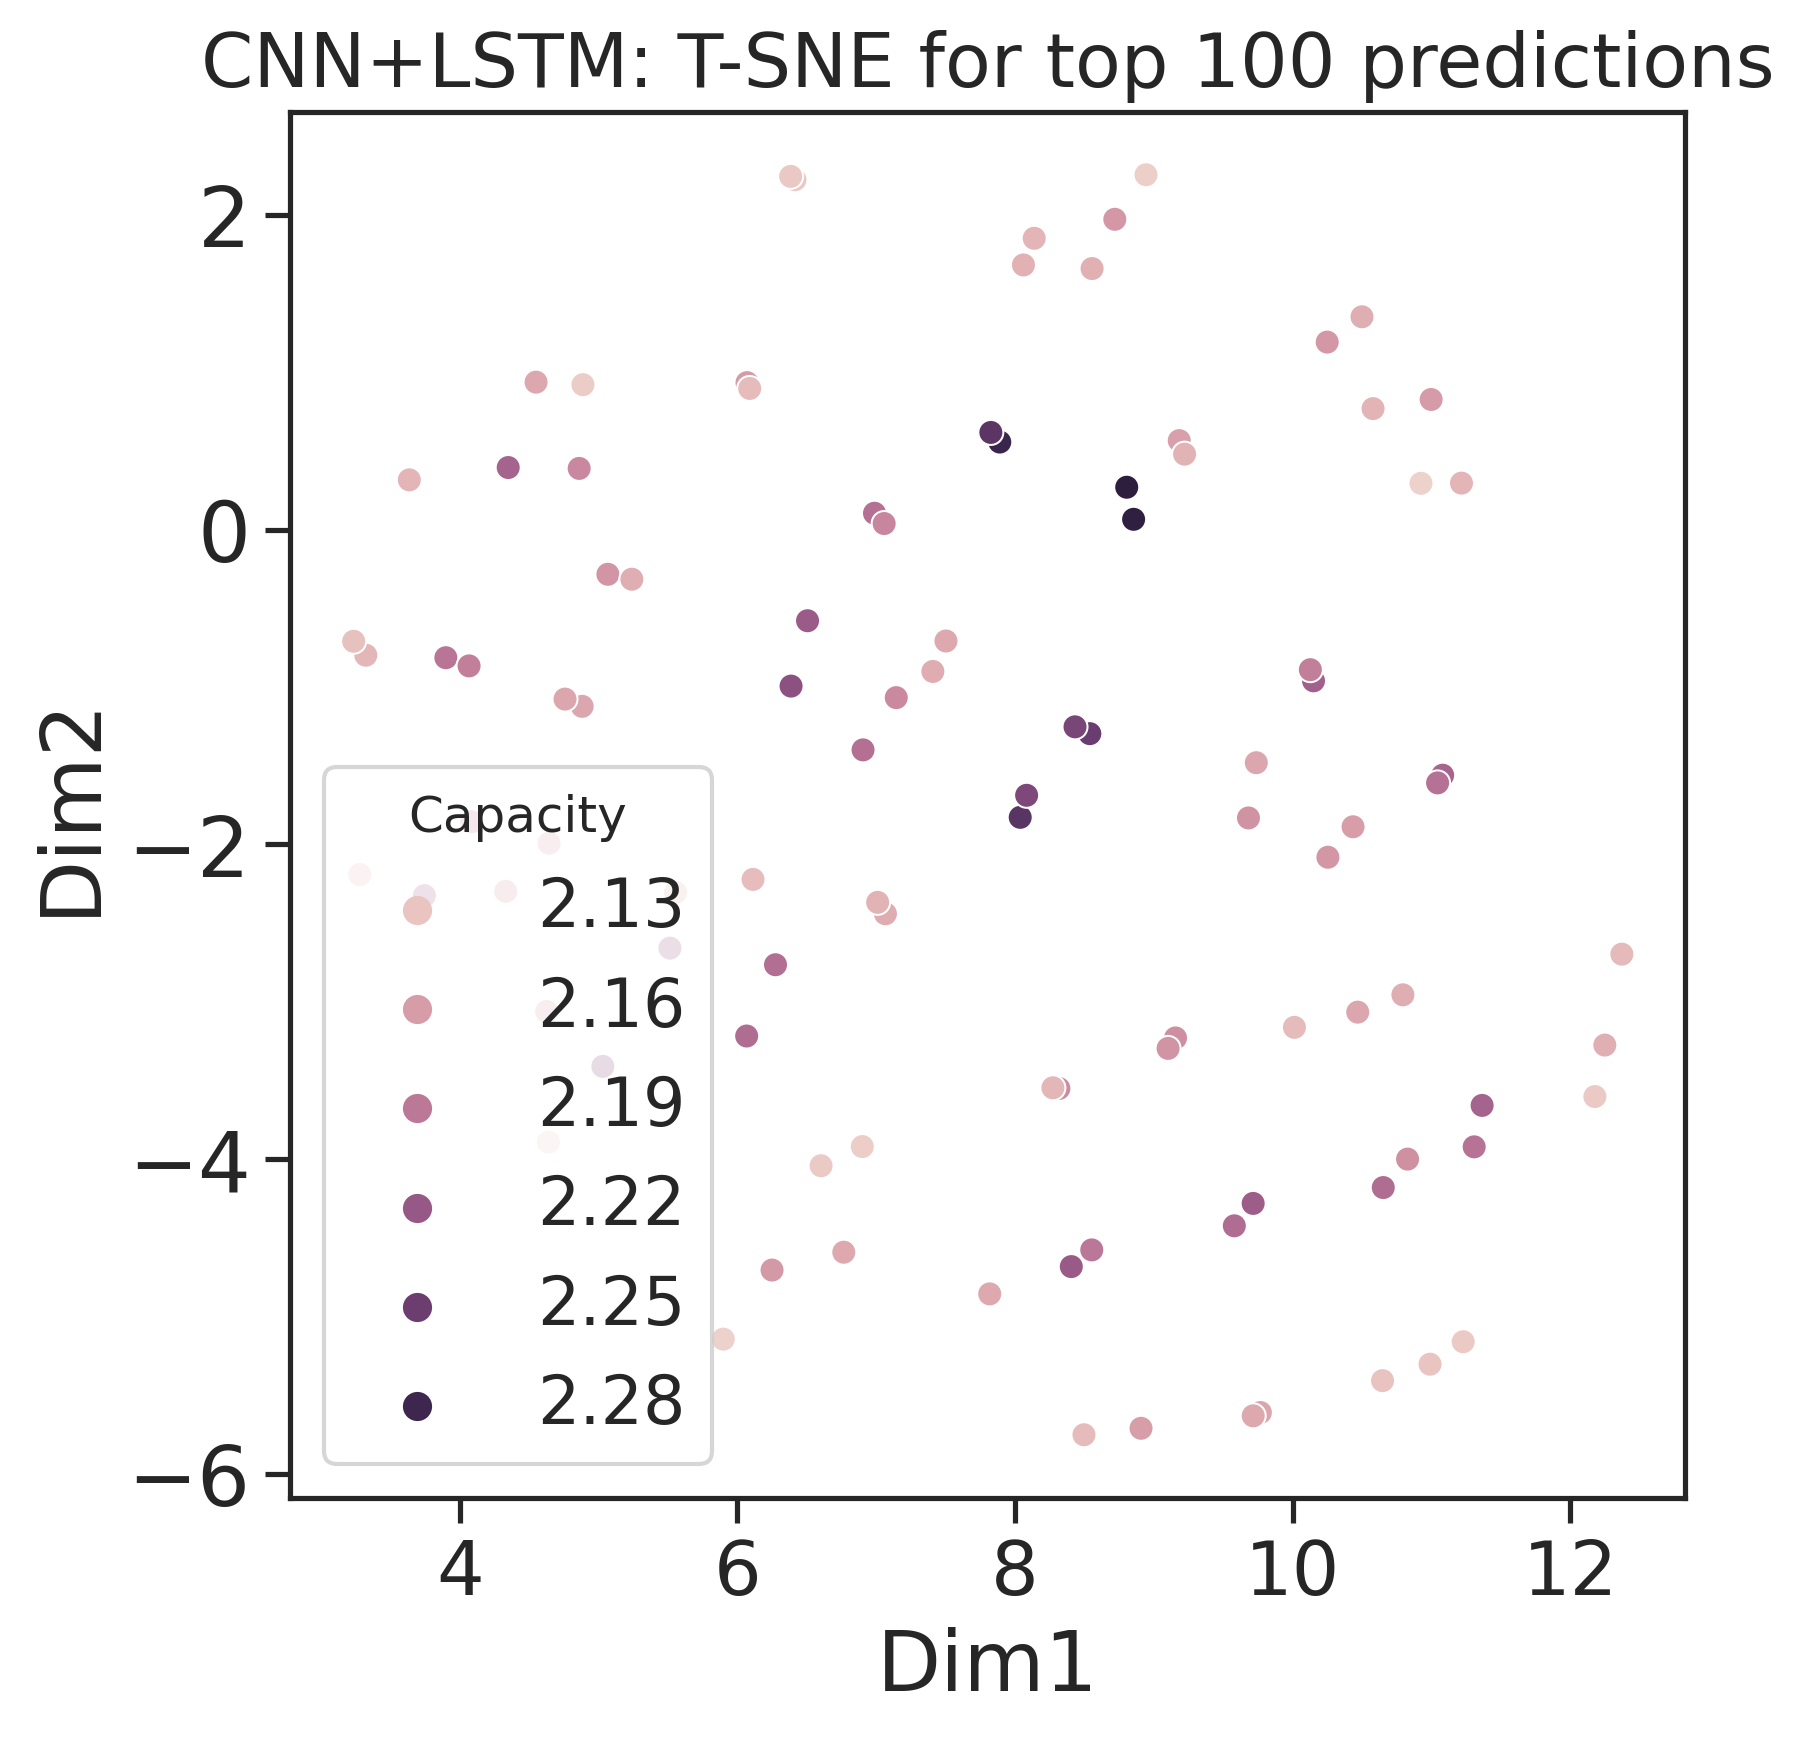

In [74]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_neu_tsne, x='Dim1', y='Dim2',hue='Capacity')

plt.title('CNN+LSTM: T-SNE for top 100 predictions')



### GBR

In [5]:
gbr_predict=pd.read_csv('data_predict/screen_prediction_05152023_nodup_gbr.csv',sep=',')
display(gbr_predict)
gbr_top = gbr_predict.drop([gbr_predict.columns[0],gbr_predict.columns[-1]],axis = 1)
gbr_tmp = gbr_top.iloc[:100,:]


Unnamed: 0  Pex1  Pex2  Pex3  Pex4  Pex5  Pex6  Pex8  Pex10  Pex11  ...  \
0       14662144     0     1     1     0     1     1     1      1      1  ...   
1       31439360     1     1     1     0     1     1     1      1      1  ...   
2       14678528     0     1     1     0     1     1     1      1      1  ...   
3       14662176     0     1     1     0     1     1     1      1      1  ...   
4       31455744     1     1     1     0     1     1     1      1      1  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
9995    14153345     0     1     1     0     1     0     1      1      1  ...   
9996    28702224     1     1     0     1     1     0     1      0      1  ...   
9997    32881170     1     1     1     1     1     0     1      0      1  ...   
9998    10477056     0     1     0     0     1     1     1      1      1  ...   
9999     9959168     0     1     0     0     1     0     1      1      1  ...   

      Pex28  Pex29  Pex30  Pex31  Pex32  Pex34  Sei1  Rtn1  Vps1  \
0         0      0      0      0      0      0     0     0     0   
1         0      0      0      0      0      0     0     0     0   
2         0      0      0      0      0      0     0     0     0   
3         0      0      0      1      0      0     0     0     0   
4         0      0      0      0      0      0     0     0     0   
...     ...    ...    ...    ...    ...    ...   ...   ...   ...   
9995      0      1      0      0      0      0     0     0     1   
9996      0      0      0      0      1      0     0     0     0   
9997      0      0      0      0      1      0     0     1     0   
9998      0      0      0      0      0      0     0     0     0   
9999      1      0      0      0      0      0     0     0     0   

      Capacity change (Fold increase compared to WT control)  
0                                              2.130168       
1                                              2.125067       
2                                              2.123958       
3                                              2.123019       
4                                              2.118868       
...                                                 ...       
9995                                           1.830973       
9996                                           1.830970       
9997                                           1.830959       
9998                                           1.830955       
9999                                           1.830950       

[10000 rows x 27 columns]

In [76]:
gbr_Y = gbr_predict.iloc[:100,-1]
gbr_Y.shape

(100,)

In [77]:
tsne = TSNE(n_components=2)

In [ ]:
gbr_tsne = tsne.fit_transform(gbr_tmp)

In [79]:
gbr_tsne_data = np.vstack((gbr_tsne.T,gbr_Y)).T


df_gbr_tsne = pd.DataFrame(gbr_tsne_data,columns=['Dim1','Dim2','Capacity'])
df_gbr_tsne.head()

Dim1      Dim2  Capacity
0 -1.804767  2.744487  2.130168
1  0.072359  1.682689  2.125067
2 -1.854693  2.164155  2.123958
3 -1.440008  2.466201  2.123019
4 -0.614573  1.601718  2.118868

Text(0.5, 1.0, 'GBR: T-SNE for top 100 predictions')

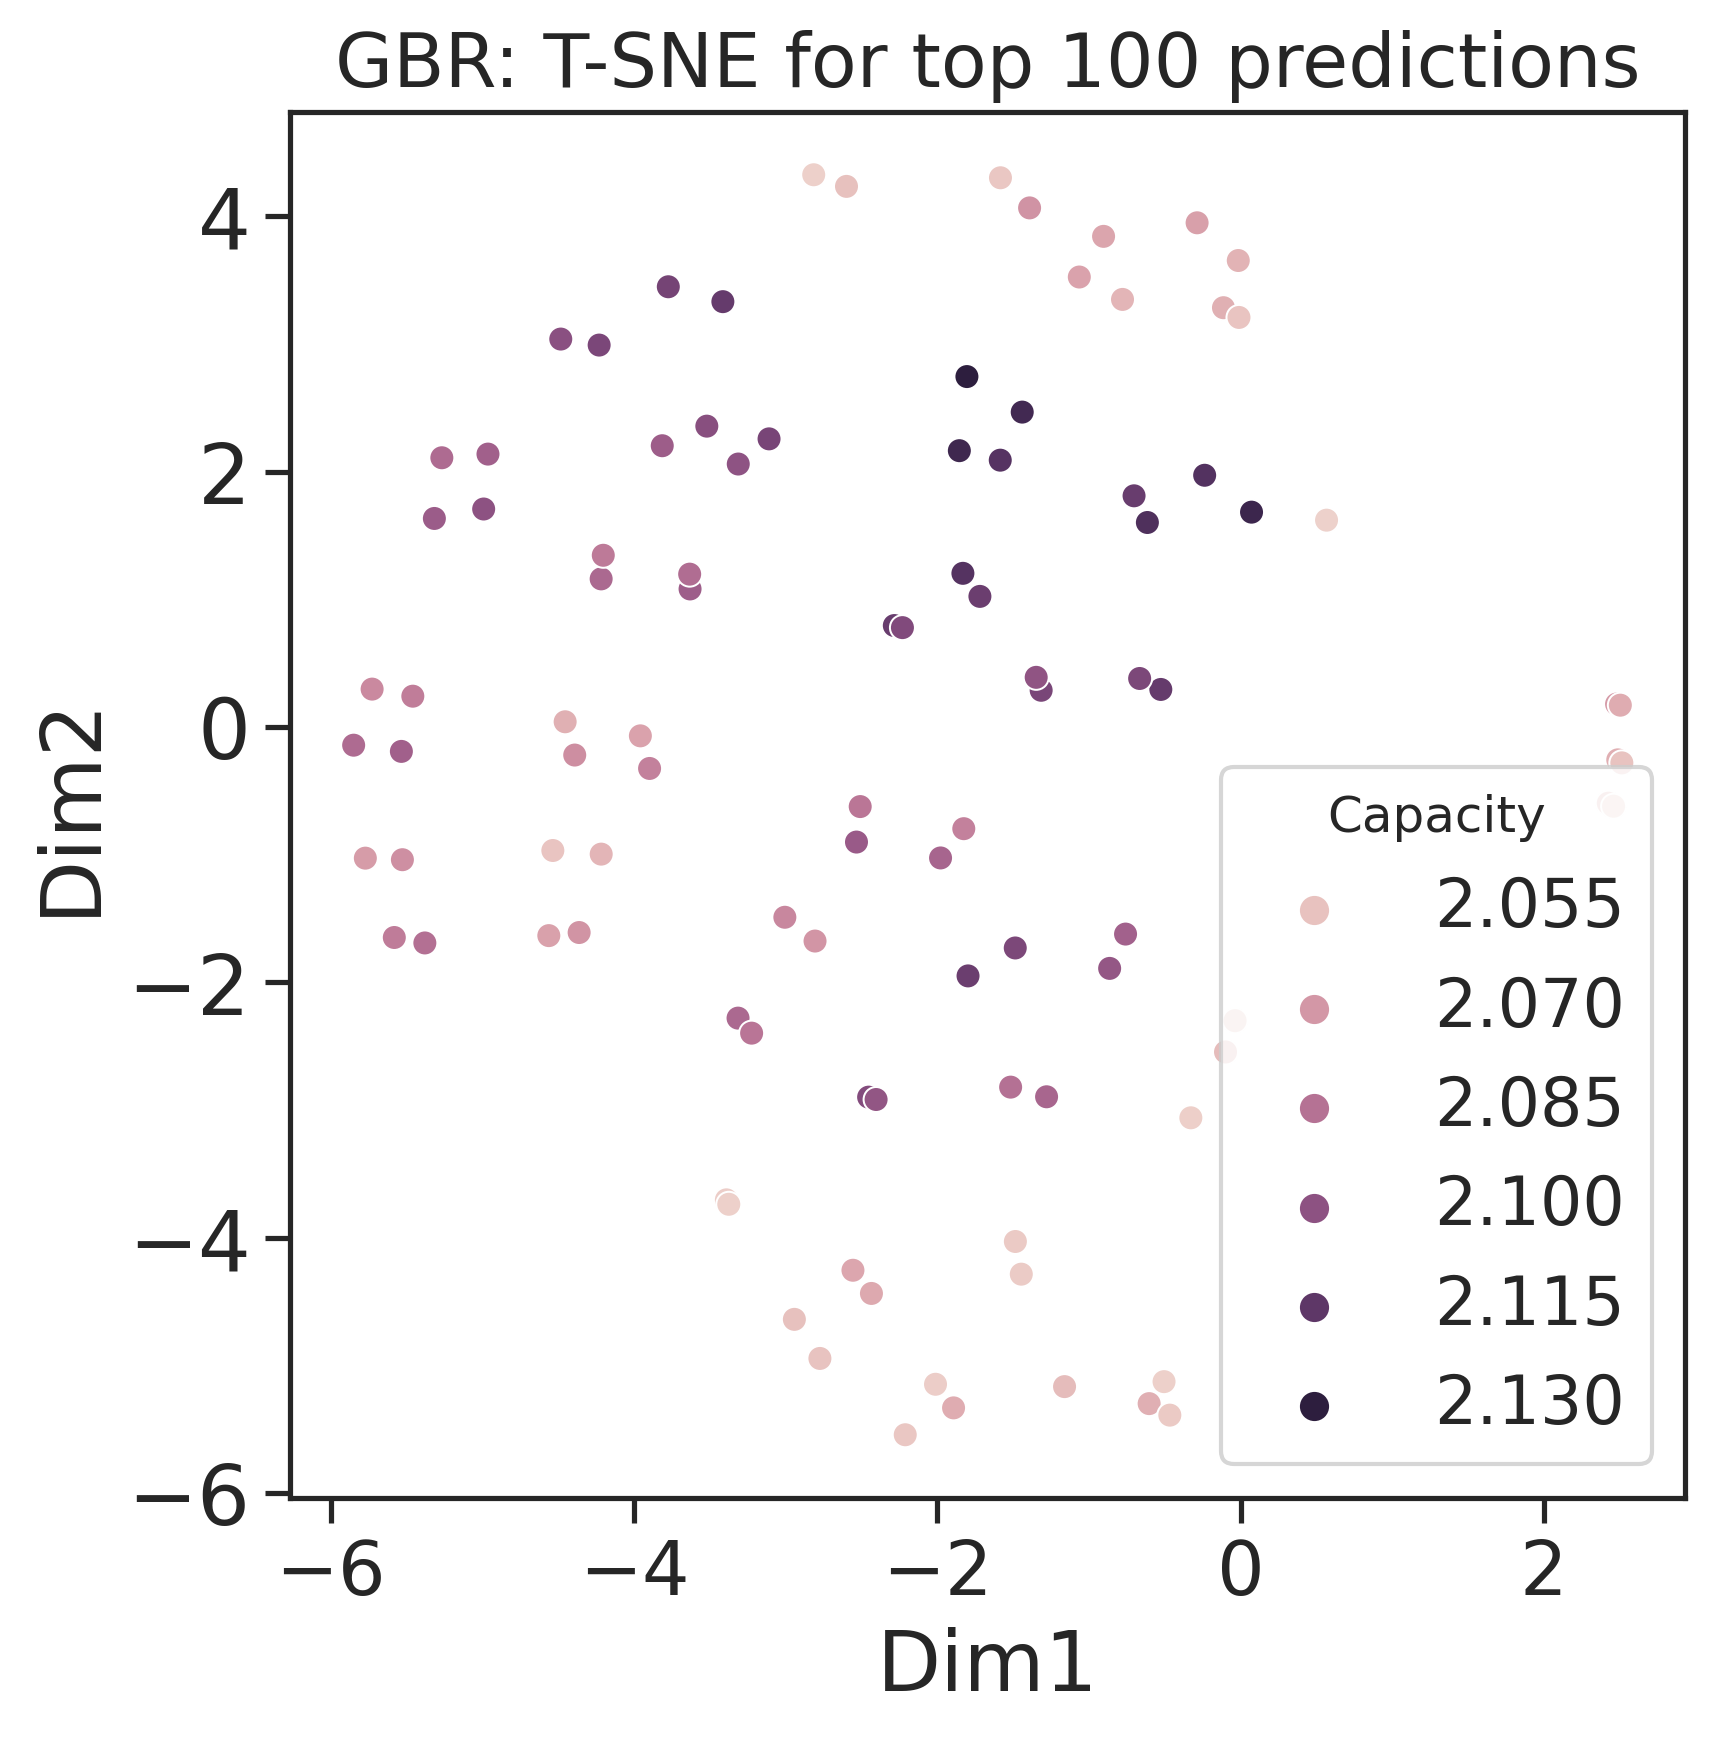

In [80]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_gbr_tsne, x='Dim1', y='Dim2',hue='Capacity')
plt.title('GBR: T-SNE for top 100 predictions')




### CNN alone

In [6]:
cnn_predict=pd.read_csv('data_predict/screen_prediction_05152023_nodup_cnn_alone.csv',sep=',')
display(cnn_predict)
cnn_top = cnn_predict.drop([cnn_predict.columns[0],cnn_predict.columns[-1]],axis = 1)


Unnamed: 0  Pex1  Pex2  Pex3  Pex4  Pex5  Pex6  Pex8  Pex10  Pex11  ...  \
0       31455776     1     1     1     0     1     1     1      1      1  ...   
1       31455744     1     1     1     0     1     1     1      1      1  ...   
2       31455777     1     1     1     0     1     1     1      1      1  ...   
3       31193633     1     1     1     0     1     1     0      1      1  ...   
4       14678528     0     1     1     0     1     1     1      1      1  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
9995    26260992     1     1     0     0     1     0     0      0      0  ...   
9996    32741893     1     1     1     1     1     0     0      1      1  ...   
9997    10222185     0     1     0     0     1     1     0      1      1  ...   
9998    13889027     0     1     1     0     1     0     0      1      1  ...   
9999    30669404     1     1     1     0     1     0     0      1      1  ...   

      Pex28  Pex29  Pex30  Pex31  Pex32  Pex34  Sei1  Rtn1  Vps1  \
0         0      0      0      1      0      0     0     0     0   
1         0      0      0      0      0      0     0     0     0   
2         0      0      0      1      0      0     0     0     1   
3         0      0      0      1      0      0     0     0     1   
4         0      0      0      0      0      0     0     0     0   
...     ...    ...    ...    ...    ...    ...   ...   ...   ...   
9995      0      0      0      0      0      0     0     0     0   
9996      0      0      0      0      0      0     1     0     1   
9997      0      0      1      1      0      1     0     0     1   
9998      0      0      0      0      0      0     0     1     1   
9999      0      0      1      0      1      1     1     0     0   

      Capacity change (Fold increase compared to WT control)  
0                                              2.368481       
1                                              2.332527       
2                                              2.315897       
3                                              2.303225       
4                                              2.283488       
...                                                 ...       
9995                                           1.798533       
9996                                           1.798525       
9997                                           1.798521       
9998                                           1.798520       
9999                                           1.798512       

[10000 rows x 27 columns]

### Train data 

In [11]:
train_data=pd.read_csv('data/overexpressed_jb_update_05152023_nodup.csv',sep=',')
display(train_data)
train_top = train_data.drop([train_data.columns[0],*train_data.columns[-3:].to_list()],axis = 1)
display(train_top)

index  Pex1  Pex2  Pex3  Pex4  Pex5  Pex6  Pex8  Pex10  Pex11  ...  \
0        0     0     0     0     0     0     0     0      0      0  ...   
1        1     0     0     0     0     0     0     0      0      0  ...   
2        2     0     0     0     0     0     0     0      0      0  ...   
3        3     0     0     0     0     0     0     0      0      0  ...   
4        4     0     0     0     0     0     0     0      0      0  ...   
..     ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
195    195     0     1     0     1     0     0     0      0      0  ...   
196    196     1     0     0     0     0     0     0      1      1  ...   
197    197     0     0     0     0     0     1     0      1      1  ...   
198    198     0     0     1     1     0     0     1      0      0  ...   
199    199     0     0     0     0     0     0     1      0      0  ...   

     Pex30  Pex31  Pex32  Pex34  Sei1  Rtn1  Vps1  capacity_mean  \
0        0      0      0      1     0     0     0          0.735   
1        0      0      1      0     0     0     0          0.970   
2        1      1      0      0     1     1     0          0.985   
3        1      1      1      1     1     1     0          0.790   
4        0      0      0      0     0     0     0          1.040   
..     ...    ...    ...    ...   ...   ...   ...            ...   
195      0      0      0      1     0     0     1          0.680   
196      1      1      0      1     1     1     0          0.480   
197      0      1      1      0     1     1     1          0.800   
198      1      0      0      1     0     1     1          0.710   
199      0      0      0      1     0     0     1          0.690   

     capacity_std  capacity_instances  
0          0.2192        (0.89, 0.58)  
1          0.0000             (0.97,)  
2          0.2192        (0.83, 1.14)  
3          0.0000             (0.79,)  
4          0.0000             (1.04,)  
..            ...                 ...  
195           NaN                 NaN  
196           NaN                 NaN  
197           NaN                 NaN  
198           NaN                 NaN  
199           NaN                 NaN  

[200 rows x 29 columns]

Pex1  Pex2  Pex3  Pex4  Pex5  Pex6  Pex8  Pex10  Pex11  Pex12  ...  \
0       0     0     0     0     0     0     0      0      0      0  ...   
1       0     0     0     0     0     0     0      0      0      0  ...   
2       0     0     0     0     0     0     0      0      0      0  ...   
3       0     0     0     0     0     0     0      0      0      0  ...   
4       0     0     0     0     0     0     0      0      0      0  ...   
..    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...  ...   
195     0     1     0     1     0     0     0      0      0      0  ...   
196     1     0     0     0     0     0     0      1      1      1  ...   
197     0     0     0     0     0     1     0      1      1      0  ...   
198     0     0     1     1     0     0     1      0      0      1  ...   
199     0     0     0     0     0     0     1      0      0      1  ...   

     Pex22  Pex28  Pex29  Pex30  Pex31  Pex32  Pex34  Sei1  Rtn1  Vps1  
0        0      0      0      0      0      0      1     0     0     0  
1        0      0      0      0      0      1      0     0     0     0  
2        0      0      0      1      1      0      0     1     1     0  
3        0      0      0      1      1      1      1     1     1     0  
4        0      1      0      0      0      0      0     0     0     0  
..     ...    ...    ...    ...    ...    ...    ...   ...   ...   ...  
195      1      0      1      0      0      0      1     0     0     1  
196      0      0      1      1      1      0      1     1     1     0  
197      0      0      0      0      1      1      0     1     1     1  
198      0      1      1      1      0      0      1     0     1     1  
199      1      0      1      0      0      0      1     0     0     1  

[200 rows x 25 columns]

## Combined all data

In [12]:
npredict=10000 # top number of predictions used for dim-reduct

In [13]:
### define top XX predictions
neu_top2 = neu_top.iloc[:npredict,:]
cnn_top2 = cnn_top.iloc[:npredict,:]
gbr_top2 = gbr_top.iloc[:npredict,:]
train_top2 = train_top

In [ ]:
neu_top2['source'] = 'CNN+LSTM'
cnn_top2['source'] = 'CNN'
gbr_top2['source'] = 'GBR'
train_top2['source'] = 'Train'
combined_df = pd.concat([cnn_top2,neu_top2,gbr_top2,train_top2],ignore_index=True)
#combined_df = pd.concat([cnn_top2,gbr_top2],ignore_index=True)
combined_df.head()

In [15]:
source_col = combined_df.iloc[:,-1]
print(source_col)
combined_df.drop('source',axis=1,inplace=True)

0          CNN
1          CNN
2          CNN
3          CNN
4          CNN
         ...  
30195    Train
30196    Train
30197    Train
30198    Train
30199    Train
Name: source, Length: 30200, dtype: object


### TSNE

In [43]:
tsne = TSNE(n_components=2,random_state=22)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#combined_df = StandardScaler().fit_transform(combined_df)

combined_tsne = tsne.fit_transform(combined_df)

In [17]:
combined_tsne_data = np.vstack((combined_tsne.T,source_col)).T


In [18]:
df_combined_tsne = pd.DataFrame(combined_tsne_data,columns=['Dim1','Dim2','source'])
df_combined_tsne.head()

Dim1       Dim2 source
0 -11.406639   9.993149    CNN
1  -6.474255    3.70342    CNN
2  -1.358652  11.783758    CNN
3  19.946962  16.026989    CNN
4  -5.974652   4.486189    CNN

In [19]:
## save tsne
##df_combined_tsne.to_csv('screen_prediction_05152023_tsne.csv')

In [7]:
## load tsne
#train_data=pd.read_csv('../data/overexpressed_jb_update_05152023_nodup.csv',sep=',')

#df_combined_tsne= pd.read_csv('screen_prediction_05152023_tsne.csv')

In [8]:
df_combined_tsne.iloc[-10:]

Unnamed: 0       Dim1       Dim2 source
30190       30190  56.200039  17.627657  Train
30191       30191  -9.539523 -24.717615  Train
30192       30192  46.828232 -47.163109  Train
30193       30193  46.801037 -47.139877  Train
30194       30194  48.755665 -43.083927  Train
30195       30195  48.557587 -48.248329  Train
30196       30196  52.972816 -45.103985  Train
30197       30197  60.955742  -3.834647  Train
30198       30198  49.541443 -48.395695  Train
30199       30199  47.989834 -48.659306  Train

In [10]:
# replace Train with Experimental screening
df_combined_tsne['source'] = df_combined_tsne['source'].replace('Train','Experiment')

In [11]:
df_combined_tsne_reorder = pd.concat([df_combined_tsne.iloc[20000:30000],df_combined_tsne.iloc[:10000],df_combined_tsne.iloc[10000:20000],
                                     df_combined_tsne.iloc[30000:]],ignore_index=True)

Text(0.5, 1.0, 't-SNE for top 10000 predictions')

<Figure size 1800x1800 with 0 Axes>

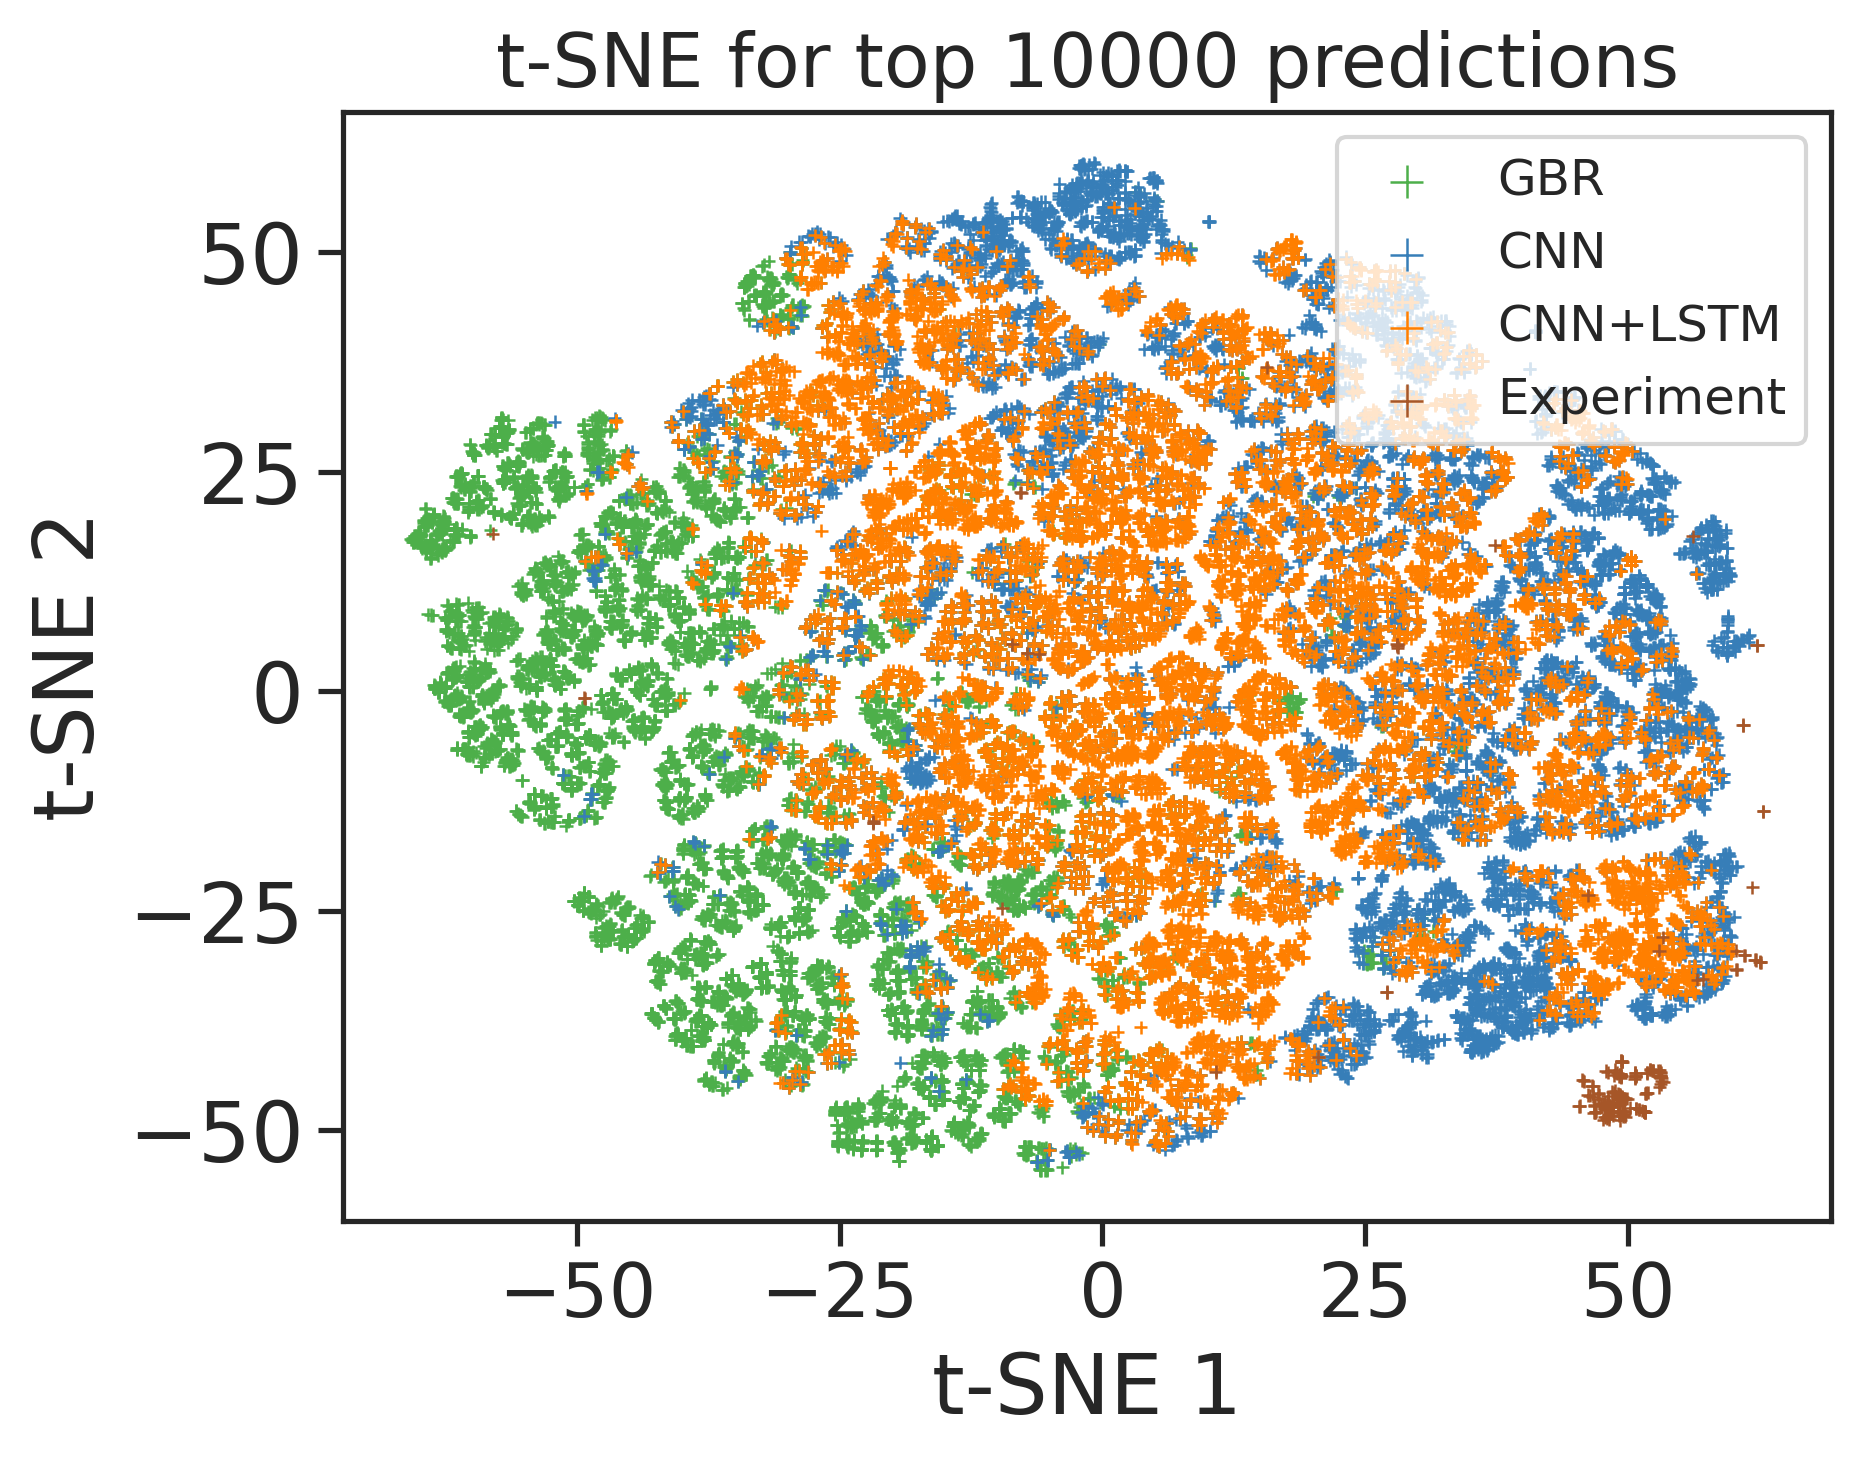

In [24]:
plt.rcParams['legend.fontsize'] = 12
plt.figure(figsize=(6, 6))
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
#markers = {"20CR": "X", "ERA-20C": "s", "ERA-Interim":'o'}


markers = {"CNN": "s", "CNN+LSTM": "+","GBR": "+","Train": "+"}

palette = ['#377EB8', '#FF7F00', '#4DAF4A',
                  '#F781BF', '#A65628', '#984EA3',
                  '#999999', '#E41A1C', '#DEDE00']


color_map = {"CNN": "#377EB8", "CNN+LSTM": "#FF7F00","GBR": "#4DAF4A","Experiment": "#A65628"}

fig, ax = plt.subplots()

categories = df_combined_tsne_reorder['source'].unique()


for cate in categories:
    cate_data = df_combined_tsne_reorder[df_combined_tsne_reorder['source'] == cate]
    ax.scatter(cate_data['Dim1'],cate_data['Dim2'],
              c=cate_data['source'].map(color_map),marker='+', linewidths=0.6,s=10, label=cate)
    
#palette = {"CNN": "C0", "CNN+LSTM": "C1","GBR": "C2","Train": "r"}
#kws = {"s": 10, "facecolor": "none", "linewidth": .6}


#plt.scatter(df_combined_tsne_reorder['Dim1'],df_combined_tsne_reorder['Dim2'],
#           c=df_combined_tsne_reorder['source'].map(color_map),marker='+',
#            linewidths=0.5)#,label=df_combined_tsne_reorder['source'])

#ax=sns.scatterplot(data=df_combined_tsne_reorder, x='Dim1', y='Dim2',hue='source', markers=markers, #marker='+',
#                palette=palette[:4],legend='full')

#ax = sns.scatterplot(data=df_combined_tsne, x='Dim1', y='Dim2',    edgecolor=df_combined_tsne["source"].map(palette),
#    **kws,)

#handles, labels = zip(*[
#    (plt.scatter([], [], ec=color, **kws), key) for key, color in palette.items()
#])
#ax.legend(handles, labels)#, title="cat")

#handles, labels = ax.get_legend_handles_labels()

#for h in handles:
#    h.set(marker='+')
#ax.legend(handles, labels)#, title="cat")

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(markerscale=2.5,fontsize=12)
plt.title(f't-SNE for top {npredict} predictions')



Text(0.5, 1.0, 't-SNE for top 10000 predictions')

<Figure size 1800x1800 with 0 Axes>

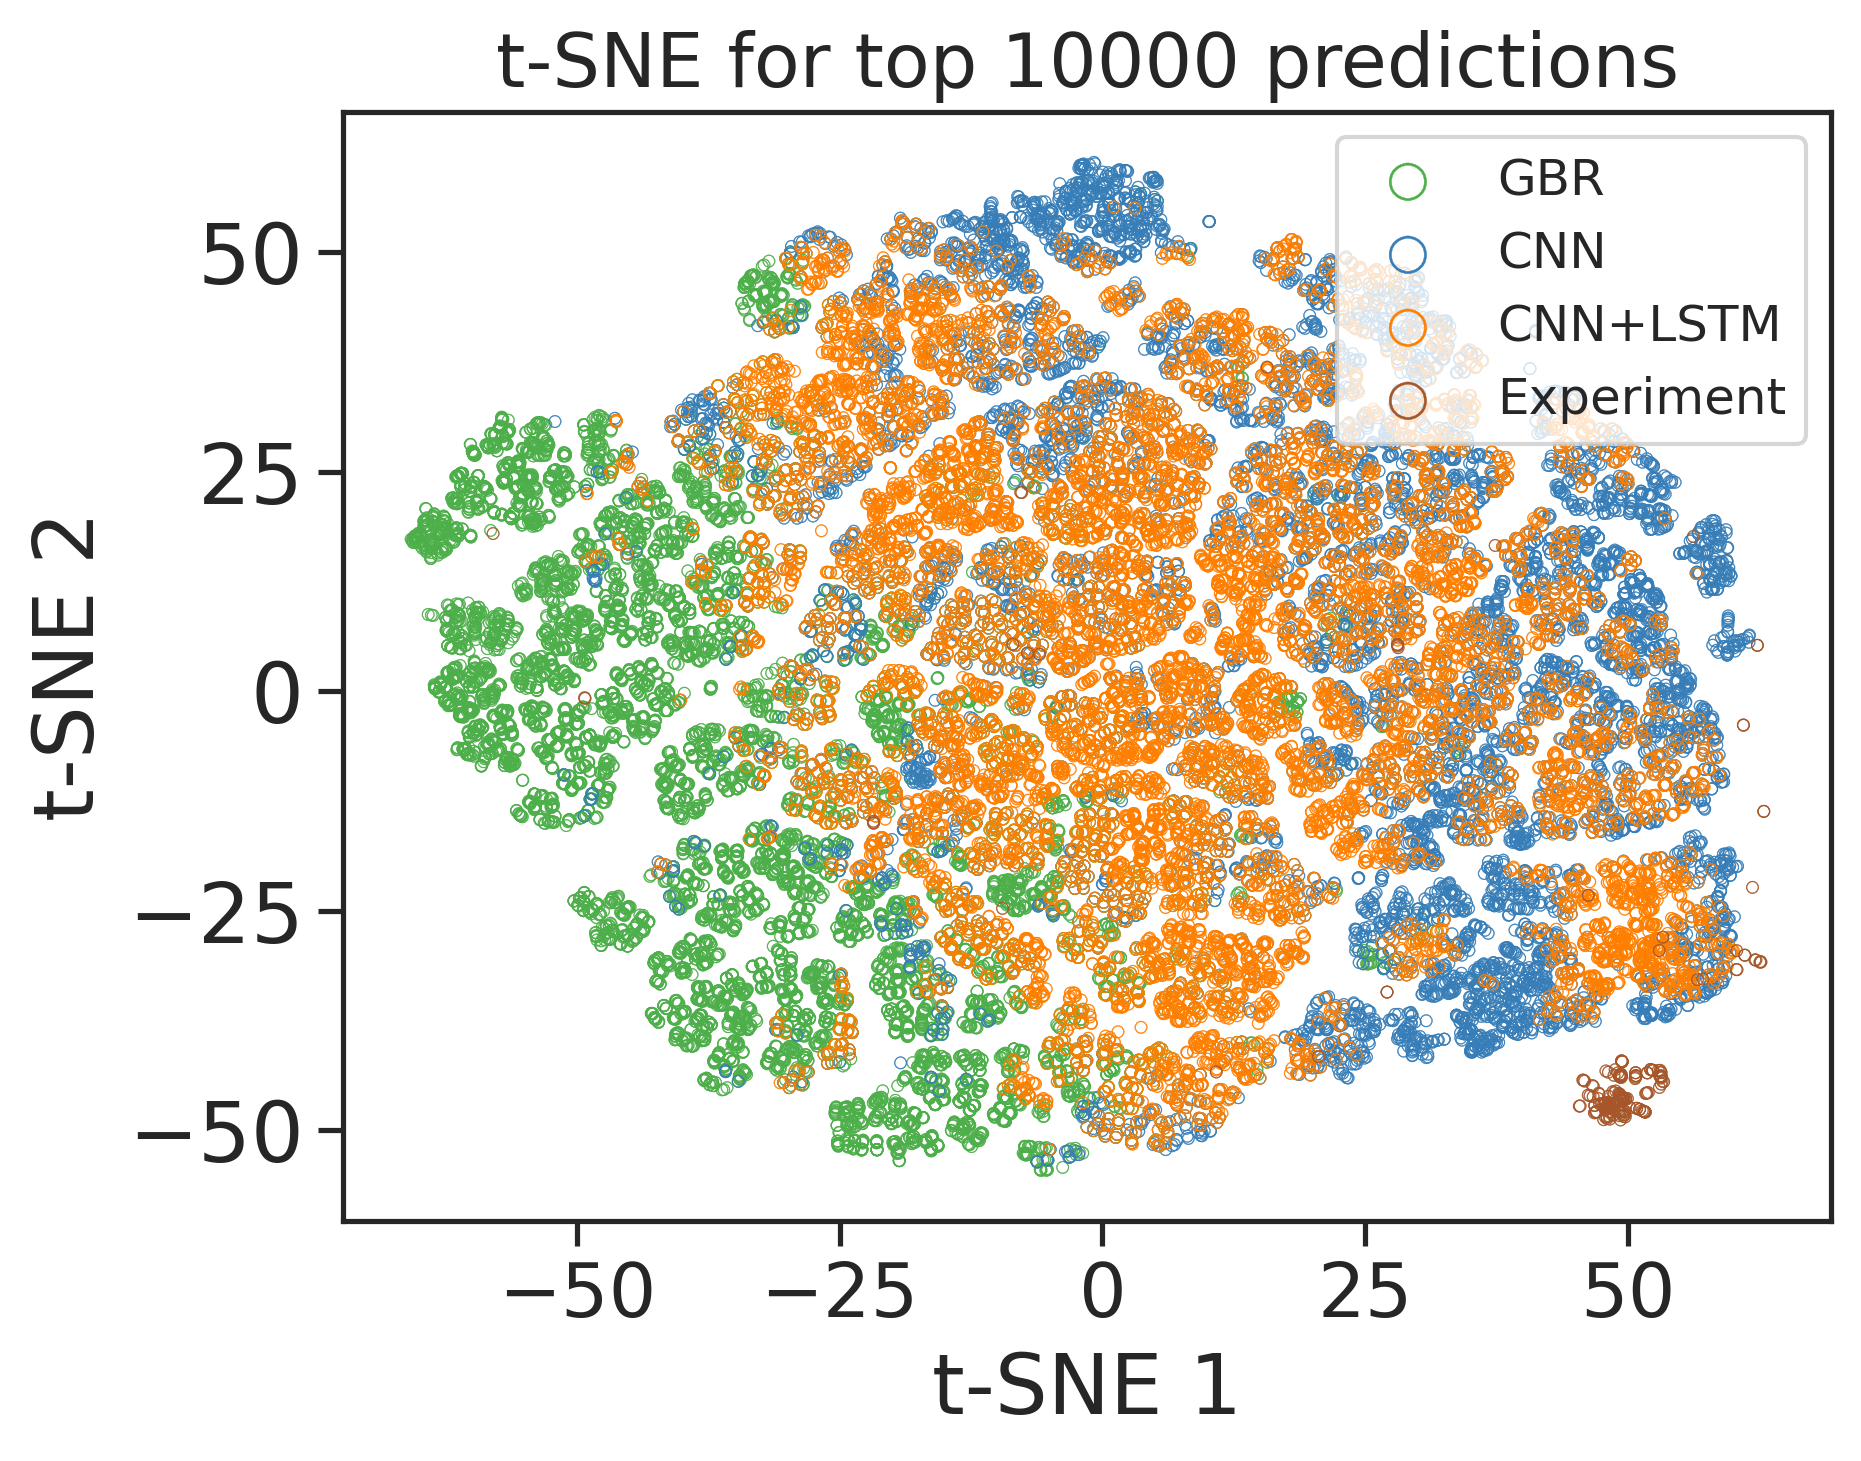

In [33]:
plt.rcParams['legend.fontsize'] = 12
plt.figure(figsize=(6, 6))
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
#markers = {"20CR": "X", "ERA-20C": "s", "ERA-Interim":'o'}


markers = {"CNN": "s", "CNN+LSTM": "+","GBR": "+","Train": "+"}

palette = ['#377EB8', '#FF7F00', '#4DAF4A',
                  '#F781BF', '#A65628', '#984EA3',
                  '#999999', '#E41A1C', '#DEDE00']


color_map = {"CNN": "#377EB8", "CNN+LSTM": "#FF7F00","GBR": "#4DAF4A","Experiment": "#A65628"}

fig, ax = plt.subplots()

categories = df_combined_tsne_reorder['source'].unique()


for cate in categories:
    cate_data = df_combined_tsne_reorder[df_combined_tsne_reorder['source'] == cate]
    sc=ax.scatter(cate_data['Dim1'],cate_data['Dim2'],
              c=cate_data['source'].map(color_map),marker="$\u25EF$",linewidths=0.1,s=10, label=cate)
    #sc.set_facecolor("none")

    
#palette = {"CNN": "C0", "CNN+LSTM": "C1","GBR": "C2","Train": "r"}
#kws = {"s": 10, "facecolor": "none", "linewidth": .6}


#plt.scatter(df_combined_tsne_reorder['Dim1'],df_combined_tsne_reorder['Dim2'],
#           c=df_combined_tsne_reorder['source'].map(color_map),marker='+',
#            linewidths=0.5)#,label=df_combined_tsne_reorder['source'])

#ax=sns.scatterplot(data=df_combined_tsne_reorder, x='Dim1', y='Dim2',hue='source', markers=markers, #marker='+',
#                palette=palette[:4],legend='full')

#ax = sns.scatterplot(data=df_combined_tsne, x='Dim1', y='Dim2',    edgecolor=df_combined_tsne["source"].map(palette),
#    **kws,)

#handles, labels = zip(*[
#    (plt.scatter([], [], ec=color, **kws), key) for key, color in palette.items()
#])
#ax.legend(handles, labels)#, title="cat")

#handles, labels = ax.get_legend_handles_labels()

#for h in handles:
#    h.set(marker='+')
#ax.legend(handles, labels)#, title="cat")

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(markerscale=3,fontsize=12)
plt.title(f't-SNE for top {npredict} predictions')



### Umap

In [16]:
mapper = umap.UMAP().fit(combined_df)

In [17]:
combined_umap = umap.UMAP().fit_transform(combined_df)

In [18]:
combined_umap.shape

(30200, 2)

In [20]:
combined_umap_data = np.vstack((combined_umap.T,source_col)).T


In [21]:
df_combined_umap = pd.DataFrame(combined_umap_data,columns=['Dim1','Dim2','source'])
df_combined_umap.head()

Dim1      Dim2 source
0  3.456498 -6.472238    CNN
1  3.354267 -6.657189    CNN
2  3.510692 -6.634217    CNN
3   4.59221 -7.166864    CNN
4  3.152829  -6.58107    CNN

In [22]:
## save umap
#df_combined_umap.to_csv('screen_prediction_05152023_umap.csv')


In [39]:
## load umap
#train_data=pd.read_csv('../data/overexpressed_jb_update_05152023_nodup.csv',sep=',')


#df_combined_umap= pd.read_csv('screen_prediction_05152023_umap.csv')

In [40]:
# replace Train with Experimental screening
df_combined_umap['source'] = df_combined_umap['source'].replace('Train','Experiment')

In [41]:
df_combined_umap_reorder = pd.concat([df_combined_umap.iloc[20000:30000],df_combined_umap.iloc[:10000],df_combined_umap.iloc[10000:20000],
                                     df_combined_umap.iloc[30000:]],ignore_index=True)

Text(0.5, 1.0, 'UMAP for top 10000 predictions')

<Figure size 1800x1800 with 0 Axes>

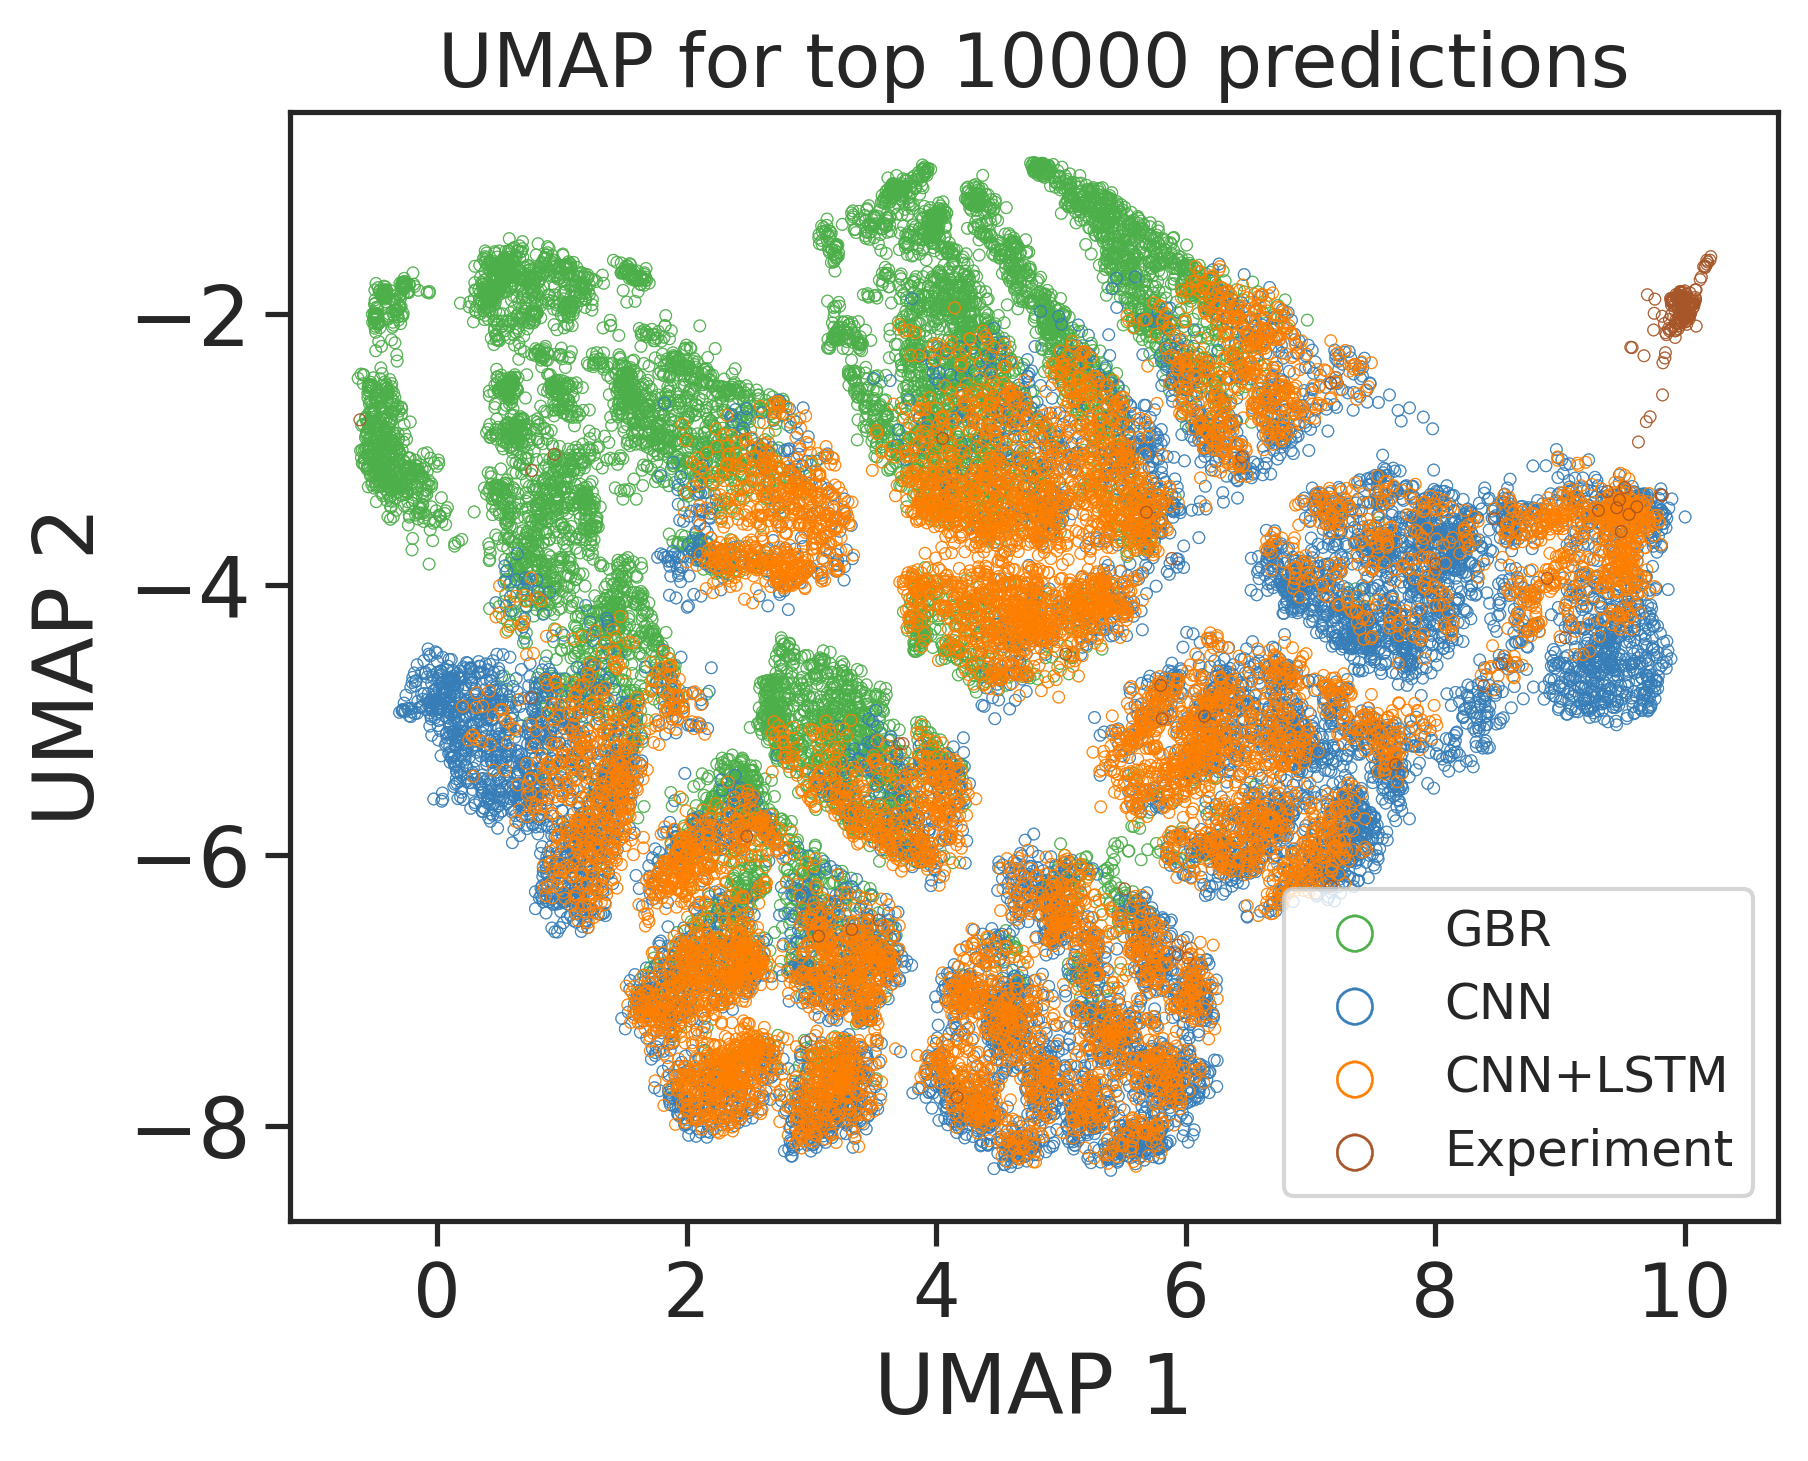

In [42]:
plt.rcParams['legend.fontsize'] = 12
plt.figure(figsize=(6, 6))
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
#markers = {"20CR": "X", "ERA-20C": "s", "ERA-Interim":'o'}


markers = {"CNN": "s", "CNN+LSTM": "+","GBR": "+","Train": "+"}

palette = ['#377EB8', '#FF7F00', '#4DAF4A',
                  '#F781BF', '#A65628', '#984EA3',
                  '#999999', '#E41A1C', '#DEDE00']


color_map = {"CNN": "#377EB8", "CNN+LSTM": "#FF7F00","GBR": "#4DAF4A","Experiment": "#A65628"}

fig, ax = plt.subplots()

categories = df_combined_umap_reorder['source'].unique()


for cate in categories:
    cate_data = df_combined_umap_reorder[df_combined_umap_reorder['source'] == cate]
    sc=ax.scatter(cate_data['Dim1'],cate_data['Dim2'],
              c=cate_data['source'].map(color_map),marker="$\u25EF$",linewidths=0.1,s=10, label=cate)
    #sc.set_facecolor("none")

    
#palette = {"CNN": "C0", "CNN+LSTM": "C1","GBR": "C2","Train": "r"}
#kws = {"s": 10, "facecolor": "none", "linewidth": .6}


#plt.scatter(df_combined_umap_reorder['Dim1'],df_combined_umap_reorder['Dim2'],
#           c=df_combined_umap_reorder['source'].map(color_map),marker='+',
#            linewidths=0.5)#,label=df_combined_umap_reorder['source'])

#ax=sns.scatterplot(data=df_combined_umap_reorder, x='Dim1', y='Dim2',hue='source', markers=markers, #marker='+',
#                palette=palette[:4],legend='full')

#ax = sns.scatterplot(data=df_combined_umap, x='Dim1', y='Dim2',    edgecolor=df_combined_umap["source"].map(palette),
#    **kws,)

#handles, labels = zip(*[
#    (plt.scatter([], [], ec=color, **kws), key) for key, color in palette.items()
#])
#ax.legend(handles, labels)#, title="cat")

#handles, labels = ax.get_legend_handles_labels()

#for h in handles:
#    h.set(marker='+')
#ax.legend(handles, labels)#, title="cat")

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(markerscale=3,fontsize=12)
plt.title(f'UMAP for top {npredict} predictions')



Text(0.5, 1.0, 'UMAP for top 10000 predictions')

<Figure size 1800x1800 with 0 Axes>

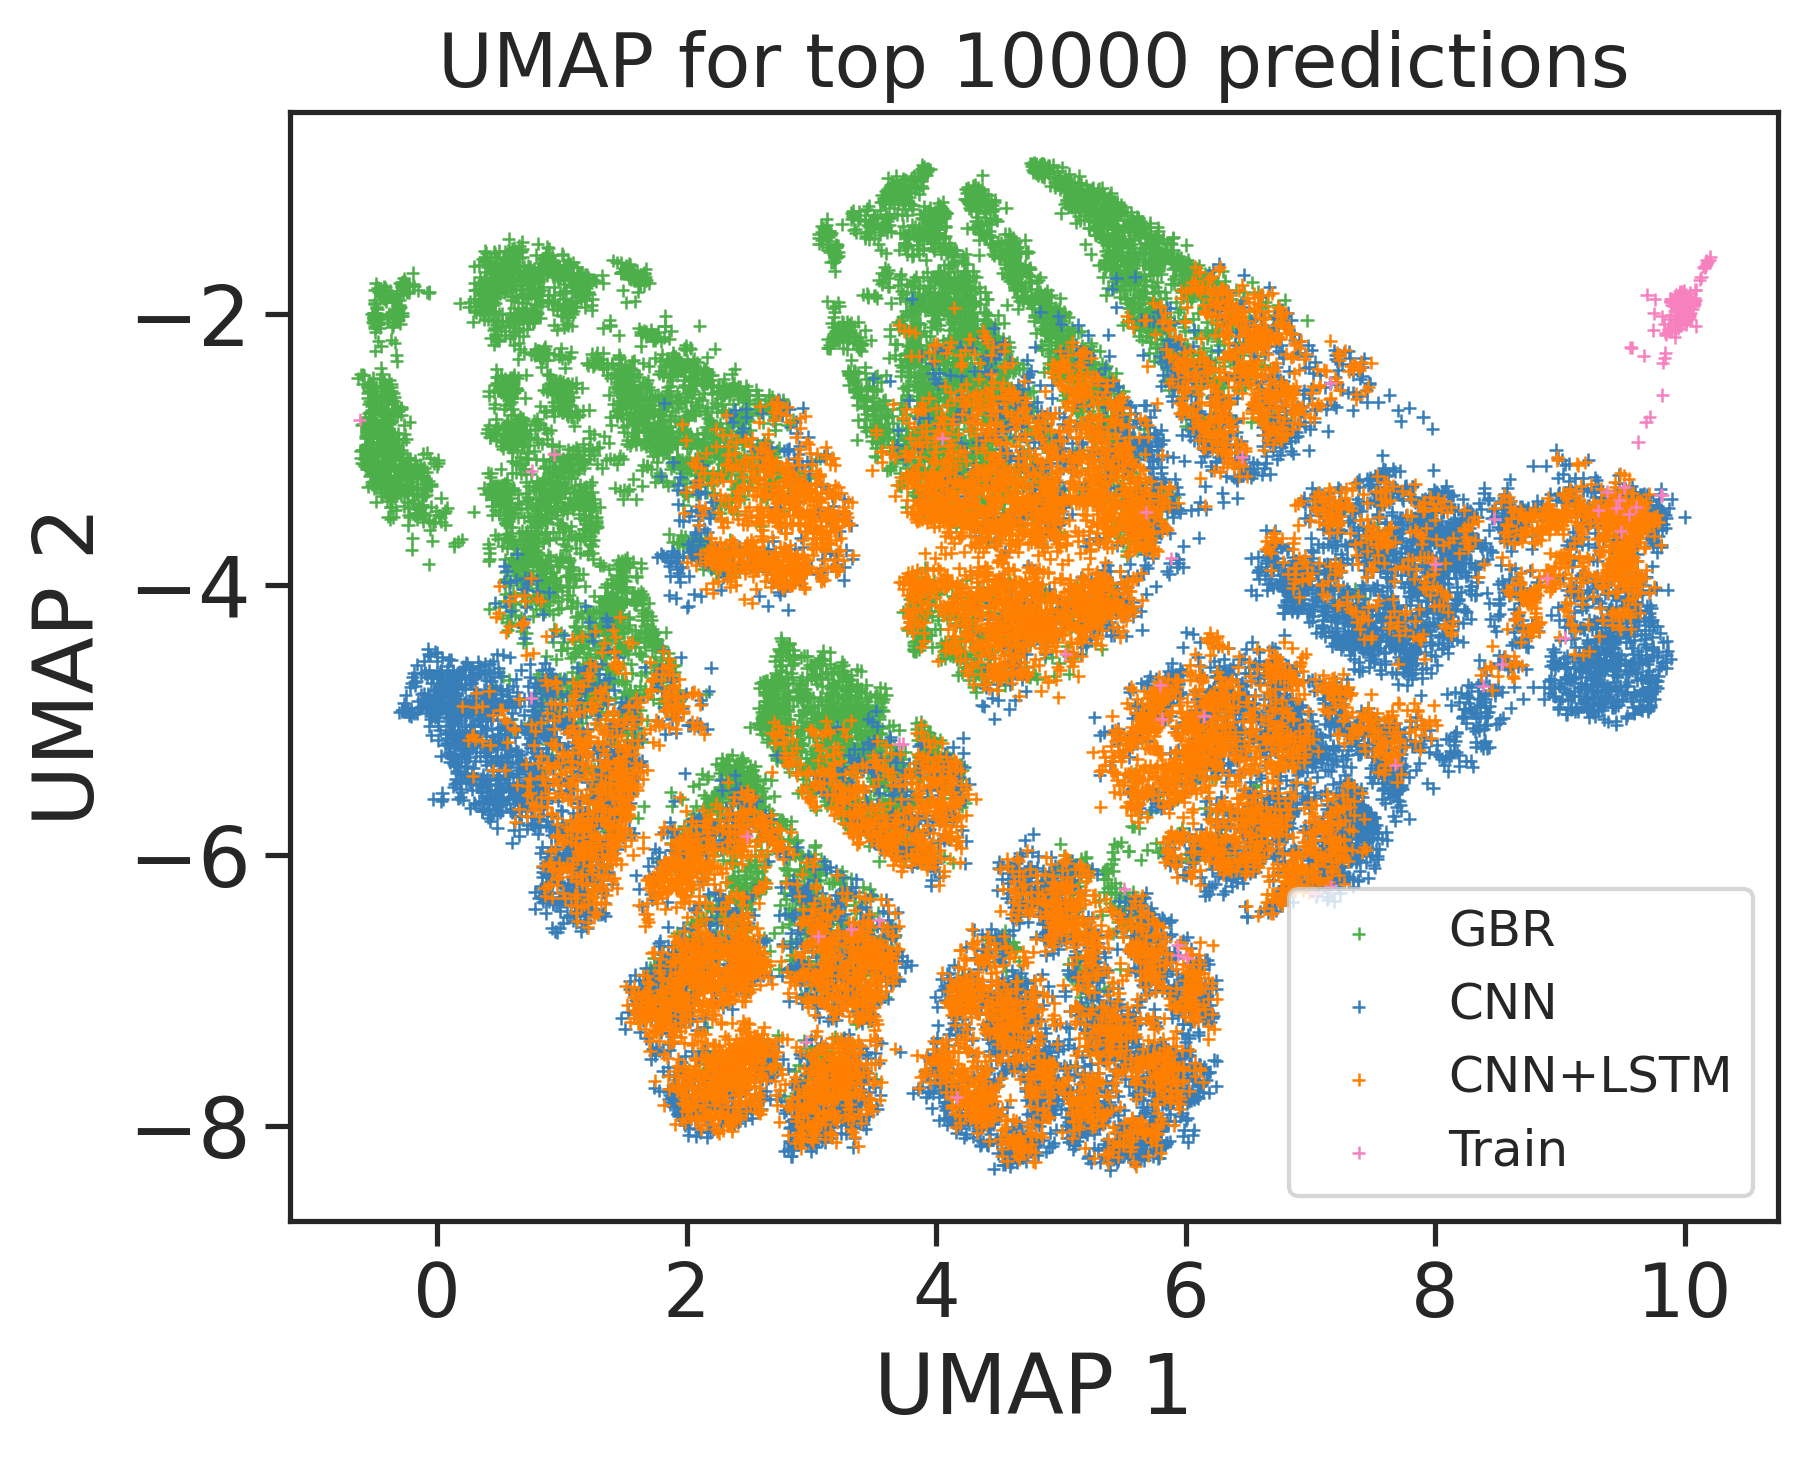

In [47]:
plt.rcParams['legend.fontsize'] = 12
plt.figure(figsize=(6, 6))
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
#markers = {"20CR": "X", "ERA-20C": "s", "ERA-Interim":'o'}


markers = {"CNN": "s", "CNN+LSTM": "+","GBR": "+","Train": "+"}

palette = ['#377EB8', '#FF7F00', '#4DAF4A',
                  '#F781BF', '#A65628', '#984EA3',
                  '#999999', '#E41A1C', '#DEDE00']


color_map = {"CNN": "#377EB8", "CNN+LSTM": "#FF7F00","GBR": "#4DAF4A","Train": "#F781BF"}

fig, ax = plt.subplots()

categories = df_combined_umap_reorder['source'].unique()


for cate in categories:
    cate_data = df_combined_umap_reorder[df_combined_umap_reorder['source'] == cate]
    ax.scatter(cate_data['Dim1'],cate_data['Dim2'],
              c=cate_data['source'].map(color_map),marker='+', linewidths=0.6,s=10, label=cate)
    
#palette = {"CNN": "C0", "CNN+LSTM": "C1","GBR": "C2","Train": "r"}
#kws = {"s": 10, "facecolor": "none", "linewidth": .6}


#plt.scatter(df_combined_umap_reorder['Dim1'],df_combined_umap_reorder['Dim2'],
#           c=df_combined_umap_reorder['source'].map(color_map),marker='+',
#            linewidths=0.5)#,label=df_combined_umap_reorder['source'])

#ax=sns.scatterplot(data=df_combined_umap_reorder, x='Dim1', y='Dim2',hue='source', markers=markers, #marker='+',
#                palette=palette[:4],legend='full')

#ax = sns.scatterplot(data=df_combined_umap, x='Dim1', y='Dim2',    edgecolor=df_combined_umap["source"].map(palette),
#    **kws,)

#handles, labels = zip(*[
#    (plt.scatter([], [], ec=color, **kws), key) for key, color in palette.items()
#])
#ax.legend(handles, labels)#, title="cat")

#handles, labels = ax.get_legend_handles_labels()

#for h in handles:
#    h.set(marker='+')
#ax.legend(handles, labels)#, title="cat")

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.title(f'UMAP for top {npredict} predictions')

